In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [2]:
# Load datasets

train_data = pd.read_csv("train.csv", sep=",")
test_data = pd.read_csv("test.csv", sep=",")
test_Yreal = pd.read_csv("gender_submission.csv")

## 1) ============================== Data manipulation ==============================

In [3]:
# Verify datasets

train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [4]:
# Checking missing values in train data
print(train_data.isnull().sum())
print("Detect missing values: Age, Cabin and Embarked columns")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Detect missing values: Age, Cabin and Embarked columns


In [5]:
# Cheking missing values in test data
print(test_data.isnull().sum())
print("Detect missing values: Age, Fare, and Cabin columns")

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Detect missing values: Age, Fare, and Cabin columns


In [6]:
# Cheking missing values in Y real dataset
test_Yreal.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

### 1.1) Clearing the data

In [7]:
# First, COMPLETING the missing values

# Stategy: use the mean or mode of column to substitute in missing values [Train Dataset]

train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
train_data['Cabin'].fillna(train_data['Cabin'].mode()[0], inplace = True) #Only to pratice
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [8]:
# Stategy: use the mean or mode of column to substitute in missing values [Test Dataset]

test_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace = True)
test_data['Cabin'].fillna(train_data['Cabin'].mode()[0], inplace = True)

In [9]:
# Excluing 'insignificant' columns in train data

delete_train_data = ['Name', 'Cabin', 'PassengerId', 'Ticket']
train_data.drop(delete_train_data, axis=1, inplace= True)

In [10]:
# Round the age and Fare
train_data = train_data.round()
test_data = test_data.round()

In [11]:
print(train_data.sample(10))

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
9           1       2  female  14.0      1      0  30.0        C
131         0       3    male  20.0      0      0   7.0        S
770         0       3    male  24.0      0      0  10.0        S
844         0       3    male  17.0      0      0   9.0        S
68          1       3  female  17.0      4      2   8.0        S
404         0       3  female  20.0      0      0   9.0        S
65          1       3    male  30.0      1      1  15.0        C
365         0       3    male  30.0      0      0   7.0        S
284         0       1    male  30.0      0      0  26.0        S
483         1       3  female  63.0      0      0  10.0        S


In [12]:
# Excluing 'insignificant' columns in test data
delete_test_data = ['Name', 'Cabin', 'PassengerId', 'Ticket']
test_data.drop(delete_test_data, axis=1, inplace= True)

In [13]:
print(test_data.sample(10))

     Pclass     Sex   Age  SibSp  Parch   Fare Embarked
400       1  female  30.0      0      0  165.0        S
262       2  female  29.0      0      2   23.0        S
387       2    male  57.0      0      0   13.0        S
270       1    male  46.0      0      0   75.0        C
330       2  female  48.0      0      2   37.0        S
9         3    male  21.0      2      0   24.0        S
112       1  female  36.0      0      0   32.0        C
358       3    male  30.0      0      0    8.0        Q
224       1  female  53.0      0      0   27.0        C
251       3    male  20.0      0      0    8.0        S


### 1.2) Creating new variable

In [14]:
# Simplifying the dataset

# Forming the 'FamilyNumber' variable based on the 'SibSp' and 'Parch' more one
train_data['FamilyNumber'] = train_data['SibSp'] + train_data['Parch'] + 1

In [15]:
# Showing the data
train_data.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyNumber
210,0,3,male,24.0,0,0,7.0,S,1
161,1,2,female,40.0,0,0,16.0,S,1
691,1,3,female,4.0,0,1,13.0,C,2


In [16]:
# Deleting variables Sibp/Parch train data
delete_SibpParch_train = ['SibSp', 'Parch']
train_data.drop(delete_SibpParch_train, axis = 1, inplace = True)

# Deleting variables Sibp/Parch test data
delete_SibpParch_test = ['SibSp', 'Parch']
test_data.drop(delete_SibpParch_test, axis = 1, inplace = True)

In [17]:
# Showing the data
train_data.sample(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyNumber
513,1,1,female,54.0,59.0,C,2
120,0,2,male,21.0,74.0,S,3
143,0,3,male,19.0,7.0,Q,1


### 1.3) Converting dataset

In [18]:
# In this part, i will converting the variables that has categorical data and pass to number values using LabelEncoder

from sklearn.preprocessing import LabelEncoder
conv = LabelEncoder()

# Variable Sex and Embarked
train_data['Sex'] = conv.fit_transform(train_data['Sex'])
train_data['Embarked'] = conv.fit_transform(train_data['Embarked'])
test_data['Sex'] = conv.fit_transform(test_data['Sex'])
test_data['Embarked'] = conv.fit_transform(test_data['Embarked'])

In [19]:
# Converting Age in Class

# 0 - Child =  12 <
# 1 - Teenager = 12-18
# 2 - Young Adult = 19-30
# 3 - Adult = 31-59
# 4 - Old = >60

# Defining the intervals in which the age classes will be added in train data
age_bins_train = [0, 12, 18, 30, 60, 150]
age_labels_train = ["Child", "Teenager", "YoungAdult", "Middle-aged", "Old"]

#Converting the numerical variable ["Age"] to categorical variable in train data
train_data['Age'] = pd.cut(train_data['Age'], age_bins_train, labels=age_labels_train, 
    right=True, include_lowest=True)

# Defining the intervals in which the age classes will be added in test data
age_bins_test = [0, 12, 18, 30, 60, 150]
age_labels_test = ["Child", "Teenager", "YoungAdult", "Middle-aged", "Old"]

#Converting the numerical variable ["Age"] to categorical variable in test data
test_data['Age'] = pd.cut(test_data['Age'], age_bins_test, labels=age_labels_test, 
    right=True, include_lowest=True)


In [20]:
# Before
train_data['Age'].sample(3)

49       Teenager
260    YoungAdult
162    YoungAdult
Name: Age, dtype: category
Categories (5, object): [Child < Teenager < YoungAdult < Middle-aged < Old]

In [21]:
# 0 - Child =  12 <
# 1 - Teenager = 12-18
# 2 - Young Adult = 19-30
# 3 - Adult = 31-59
# 4 - Old = >60

# Now, i'll use again LabelEncoder in variable ['Age'] to transform in number.

train_data['Age'] = conv.fit_transform(train_data['Age'])
test_data['Age'] = conv.fit_transform(test_data['Age'])

In [22]:
# After
train_data['Age'].sample(3)

318    1
632    1
455    4
Name: Age, dtype: int64

In [23]:
# Converting Fare in Class

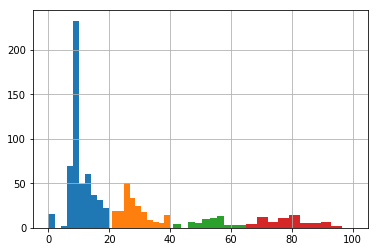

In [24]:
# With the help of the histogram it is possible to analyze ticket prices in order to define the classes and purchasing power of passengers

train_data['Fare'].hist(range = (0,20))
train_data['Fare'].hist(range = (21,40))
train_data['Fare'].hist(range = (41,65))
train_data['Fare'].hist(range = (65,100))

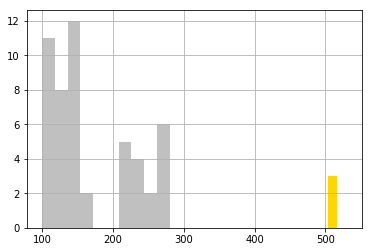

In [25]:
train_data['Fare'].hist(range = (100,280), color="silver")
train_data['Fare'].hist(range = (400,530), color="gold")

In [26]:
# To simplify the data, i separate the ticket price class this form:

# 0 - (0$) - FreePassengers(Probabily workers)
# 1 - (1-20$) - LowClass
# 2 - (21-99) - MediumClass
# 3 - (>100) - HighClass

# Defining the intervals in which the Fare classes will be added in train data
fare_bins_train = [0, 1, 21, 100,550]
fare_labels_train = ["Free", "Low Class", "Medium Class", "High Class"]

#Converting the numerical variable ["Fare"] to categorical variable in train data
train_data['Fare'] = pd.cut(train_data['Fare'], bins = fare_bins_train, labels = fare_labels_train, 
                            right=True, include_lowest=True)

# Defining the intervals in which the Fare classes will be added in test data
fare_bins_test = [0,1,21,100,550]
fare_labels_test = ["Free", "Low Class", "Medium Class", "High Class"]

#Converting the numerical variable ["Fare"], to categorical variable in test data
test_data['Fare'] = pd.cut(test_data['Fare'], bins = fare_bins_test, labels = fare_labels_test, 
                          right=True, include_lowest= True)

In [27]:
# Before treatment
train_data['Fare'].sample(3)

509    Medium Class
90        Low Class
511       Low Class
Name: Fare, dtype: category
Categories (4, object): [Free < Low Class < Medium Class < High Class]

In [28]:
# Now, i'll use again LabelEncoder in variable ['Fare'] to transform in number.

# 0 - (0$) - FreePassengers(Probabily workers)
# 1 - (1-20$) - LowClass
# 2 - (21-99) - MediumClass
# 3 - (>100) - HighClass

train_data['Fare'] = conv.fit_transform(train_data['Fare'])
test_data['Fare'] = conv.fit_transform(test_data['Fare'])

In [29]:
# After treatment
train_data['Fare'].sample(3)

622    2
713    2
164    3
Name: Fare, dtype: int64

In [30]:
# Now the dataset is ready to work
train_data.sample(15)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyNumber
438,0,1,1,2,1,2,6
423,0,3,0,4,2,2,3
670,1,2,0,1,3,2,3
858,1,3,0,4,2,0,4
757,0,2,1,3,2,2,1
456,0,1,1,2,3,2,1
666,0,2,1,4,2,2,1
239,0,2,1,1,2,2,1
241,1,3,0,4,2,1,2
211,1,2,0,1,2,2,1


## 2) ========Exploratory Analysis =========